This Jupyter notebook is based on the example at the begining of https://panel.holoviz.org/reference/panes/Matplotlib.html
at the very begining of the [_Resources_](https://panel.holoviz.org/reference/panes/Matplotlib.html#resources) section.

The difference is that the example taken from the above mentioned section of the documentation is then enhanced with some basic widgets, and served with `pm.template.[...].servable();`.  This part is inspired by the _Getting Started > Build an App_ documentation at https://panel.holoviz.org/getting_started/build_app.html
but using the [`EditableTemplate`](https://panel.holoviz.org/reference/templates/EditableTemplate.html) template rather than `Material` template.

-----

In [1]:
import panel as pn

#pn.extension('ipywidgets')
pn.extension('ipywidgets', design="material", sizing_mode="stretch_width")

The `Matplotlib` pane allows displaying [Matplotlib](http://matplotlib.org) figures inside a Panel app. This includes figures created by [Seaborn](https://seaborn.pydata.org/), [Pandas `.plot`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), [Plotnine](https://plotnine.readthedocs.io/) and any other plotting library building on top of `Matplotlib`.


The `Matplotlib` pane will render the `object` to PNG or SVG at the declared DPI and then display it.

#### Parameters:

* **``alt_text``** (str, default=None): alt text to add to the image tag. The alt text is shown when a user cannot load or display the image. 
* **``dpi``** (int, default=144): The dots per inch of the exported png.
* **``encode``** (bool, default=False): Whether to encode 'svg' as base64. Default is False. 'png' will always be encoded.
* **``fixed_aspect``** (boolean, default=True): Whether the aspect ratio of the figure should be forced to be equal.
* **``format``** (str, default='png'): The format to render the figure to: 'png' or 'svg'.
* **``high_dpi``** (bool, default=True): Whether to optimize output for high-dpi displays.
* **``interactive``** (boolean, default=False): Whether to use the interactive ipympl backend.
* **``link_url``** (str, default=None): A link URL to make the figure clickable and link to some other website.
* **``object``** (matplotlib.Figure): The Matplotlib [`Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object to display.
* **``tight``** (bool, default=False): Automatically adjust the figure size to fit the subplots and other artist elements.

#### Resources:

- [How to - Style Matplotlib Plots](https://panel.holoviz.org/how_to/styling/matplotlib)
___

In [2]:
import numpy as np

from matplotlib.figure import Figure
from matplotlib import cm

# Defining the plot

Matplotlib(Figure)
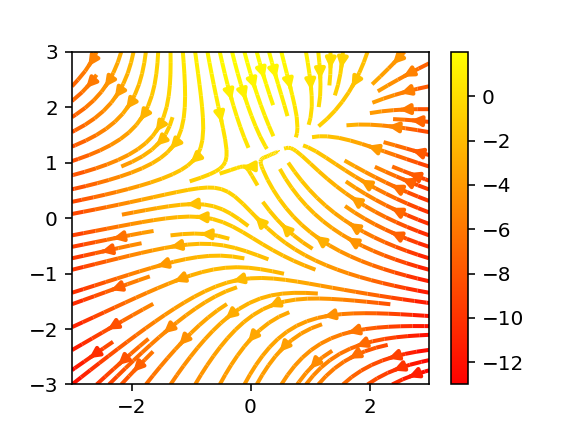

In [3]:
def plot_streamplot(xrange, yrange):
    xmin, xmax = xrange
    ymin, ymax = yrange
    Y, X = np.mgrid[ymin:ymax:100j, xmin:xmax:100j]
    U = -1 - X**2 + Y
    V = 1 + X - Y**2

    fig = Figure(figsize=(4, 3))
    ax = fig.subplots()

    strm = ax.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=cm.autumn)
    fig.colorbar(strm.lines)

    mpl_pane = pn.pane.Matplotlib(fig, dpi=144)
    return mpl_pane

plot_streamplot((-3,+3),(-3,+3))

You might have noticed that we did not use the ``matplotlib.pyplot`` API above. We did this in order to avoid having to specifically close the figure. If the figure is not closed with `plt.close(fig)`, it will cause memory leaks.

# Exploring the Parameter Space

Let’s create some Panel slider widgets to explore the range of parameter values (here: the range of the plot):

In [4]:
xrange_slider = pn.widgets.RangeSlider(
    name='X Range Slider', start=-10, end=+10, value=(-3, +3), step=0.01)
yrange_slider = pn.widgets.RangeSlider(
    name='Y Range Slider', start=-10, end=+10, value=(-3, +3), step=0.01)

xrange_slider

RangeSlider(end=10, name='X Range Slider', start=-10, step=0.01, value=(-3, 3), value_end=3, value_start=-3)

In [5]:
def reset_range_sliders(_event):
    xrange_slider.value = (-3, +3)
    yrange_slider.value = (-3, +3)

reset_button = pn.widgets.Button(
    name='Reset ranges',
    button_type='primary',
    on_click=reset_range_sliders,
)

reset_button

Button(button_type='primary', name='Reset ranges')

Now, let’s link these widgets to our plotting function so that updates to the widgets rerun the function. We can achieve this easily in Panel using `pn.bind`, and perform a simple test that it works:

<function param.reactive.bind.<locals>.wrapped(*wargs, **wkwargs)>
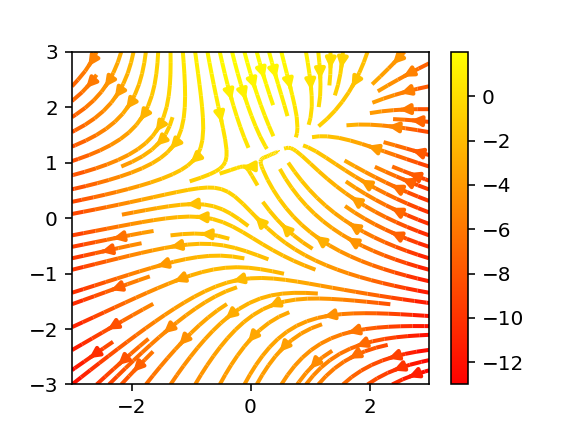

In [6]:
bound_plot_streamplot = pn.bind(
    plot_streamplot, xrange_slider, yrange_slider
)

bound_plot_streamplot

Once we’ve bound the widgets to the function’s arguments, we can layout the resulting `bound_plot_streamplot` component along with the widgets using a Panel layout such as `Column` or `Row`.

Here we put all the widgets together in a single `Column`.

In [9]:
widgets = pn.Column(
    xrange_slider, 
    yrange_slider, 
    reset_button,
sizing_mode="fixed", width=300)

widgets

Column(sizing_mode='fixed', width=300)
    [0] RangeSlider(end=10, name='X Range Slider', start=-10, step=0.01, value=(-3, 6.620000000000001), value_end=6.620000000000001, value_start=-3)
    [1] RangeSlider(end=10, name='Y Range Slider', start=-10, step=0.01, value=(-3, 3), value_end=3, value_start=-3)
    [2] Button(button_type='primary', name='Reset ranges')

As long as you have a live Python process running, dragging these widgets will trigger a call to the `plot_streamplot` callback function, evaluating it for whatever combination of parameter values you select and displaying the results.

# Serving the Notebook

We’ll organize our components in a nicely styled template (`EditableTemplate` or `MaterialTemplate`) and mark it `.servable()` to add it to our served app

This template works with _"Preview with Panel"_ button on the JupyterLab toolbar, but not with `panel serve --address ...` (see below).

In [7]:
# Instantiate the template with widgets displayed in the sidebar
template = pn.template.EditableTemplate(
    editable=True,
    title='Matplotlib Streamlines demo (EditableTemplate)',
    sidebar=[
        xrange_slider, 
        yrange_slider, 
        reset_button
    ],
)
# Append a layout to the main area, to demonstrate the list-like API
template.main.extend([
    bound_plot_streamplot
])

template.servable();

Somehow the template below creates empty page

In [8]:
#pn.template.MaterialTemplate(
#    site="Panel",
#    title="Matplotlib Streamlines demo (Material)",
#    sidebar=[
#        xrange_slider, 
#        yrange_slider, 
#        reset_button
#    ],
#    main=[
#        bound_plot_streamplot,
#    ],
#).servable(); # The ; is needed in the notebook to not display the template. Its not needed in a script

![Panel favicon](https://panel.holoviz.org/_static/favicon.ico)

You can now preview the app by clicking the _Jupyter Panel Preview_ icon. This icon can be found above the notebook.

See the _[Develop in a Notebook](https://panel.holoviz.org/tutorials/basic/develop_notebook.html)_
in the Panel documentation, in _Basic Tutorials_.

Finally, we’ll serve the app by running the command below in a terminal:
```commandline
panel serve --dev 00-panel-simple-Matplotlib.ipynb
```
Now, you can open the app in your browser at http://localhost:5006/app.

If you want to serve the app via outside IP, other than `localhost`, you can use something like the following:
```commandline
panel serve --address=158.75.112.151 --allow-websocket-origin=158.75.112.151:5006 --dev 00-panel-simple-Matplotlib.ipynb
```

This can be done from the console (with appropriate virtual environment activated), or from Terminal launched from JypyterLab

```
2024-10-15 15:43:15,079 Starting Bokeh server version 3.6.0 (running on Tornado 6.4.1)
2024-10-15 15:43:15,080 User authentication hooks NOT provided (default user enabled)
2024-10-15 15:43:15,081 Bokeh app running at: http://158.75.112.151:5006/00-panel-simple-Matplotlib
2024-10-15 15:43:15,081 Starting Bokeh server with process id: 2409218
2024-10-15 15:43:59,413 WebSocket connection opened
2024-10-15 15:43:59,414 ServerConnection created
```

Unfortunately, app served from `panel serve ...` is almost empty.